In [1]:
from pydicom import dcmread
from pydicom.data import get_testdata_files

filename = get_testdata_files('MR_small.dcm')[0]
ds = dcmread(filename)

print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 190
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002,0013) Implementation Version Name         SH: 'DCTOOL100'
(0002,0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008,0012) Instance Creation Date              DA: '20040826'
(0008,0013) Instance Creation Time              TM: '185434'
(0008,0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008,0016) SOP Class UID                       UI: MR I

In [2]:
print(ds.PatientName)
print(ds[0x10,0x10].value)
print(ds[0x100010].value)

CompressedSamples^MR1
CompressedSamples^MR1
CompressedSamples^MR1


In [5]:
# to alter the name of patient
# ds.PatientName = 'anonymous'

# del the col of patient name
# del ds[0x10,0x10]

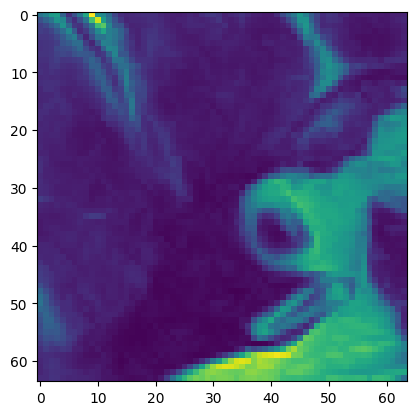

In [4]:
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array)
plt.show()

In [7]:
print(ds.Rows, ds.Columns)
# downsample the image
data_downsampling = ds.pixel_array[::4, ::4]

# put the downsampled image back to the dicom dataset
ds.PixelData = data_downsampling.tobytes()

# update the size of the image
ds.Rows, ds.Columns = data_downsampling.shape
print(ds.Rows, ds.Columns)


64 64
16 16


In [ ]:
# save as new dicom
# ds.save_as('new.dcm')